In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
choice = 2  #start from 0
devices = ['nfet_01v8_lvt', 'nfet_01v8', 'pfet_01v8_lvt', 'pfet_01v8']

# widths used for characterization and fringe cap parameters (fringe caps are not included in ngspice output)
w = [5e-6, 5e-6, 5e-6, 5e-6]
cgdo_w = [2.39289e-10, 2.44907e-10, 2e-11, 5.24893e-11]
cfringe = cgdo_w[choice]*w[choice]
print(cfringe)

1e-16


In [3]:
df_raw = pd.read_csv('./simulation/techsweep_'+devices[choice]+'.txt', sep='\s+')
par_names = df_raw.columns.to_list()
par_prefix = par_names[1].split('[')[0]
print(par_prefix)

@m.xm1.msky130_fd_pr__pfet_01v8_lvt


In [4]:
# remove extra headers in file body and unwanted columns
df_raw = df_raw[~df_raw['v-sweep'].str.contains('v-sweep')]
df = df_raw.drop(['v-sweep', 'v-sweep.1'], axis=1)
df = df.apply(pd.to_numeric).abs()

# rename columns for readability
df.columns = df.columns.str.removeprefix(par_prefix+'[')
df.columns = df.columns.str.removesuffix(']')
df

,capbd,capbs,cgg,gds,gm,gmbs,id,l,vth,b,d,g
0,2.812000e-15,2.812000e-15,3.804000e-15,1.388000e-08,1.860000e-27,9.467000e-27,0.000000,3.500000e-07,0.3361,0.0,0.0,0.000
1,2.812000e-15,2.812000e-15,3.781000e-15,2.670000e-08,0.000000e+00,0.000000e+00,0.000000,3.500000e-07,0.3361,0.0,0.0,0.025
2,2.812000e-15,2.812000e-15,3.763000e-15,5.077000e-08,0.000000e+00,0.000000e+00,0.000000,3.500000e-07,0.3361,0.0,0.0,0.050
3,2.812000e-15,2.812000e-15,3.754000e-15,9.514000e-08,0.000000e+00,0.000000e+00,0.000000,3.500000e-07,0.3361,0.0,0.0,0.075
4,2.812000e-15,2.812000e-15,3.755000e-15,1.751000e-07,0.000000e+00,0.000000e+00,0.000000,3.500000e-07,0.3361,0.0,0.0,0.100
...,...,...,...,...,...,...,...,...,...,...,...,...
223854,1.535000e-15,2.351000e-15,9.143000e-14,7.807000e-07,1.198000e-04,2.058000e-05,0.000074,3.000000e-06,0.5475,0.4,1.8,1.700
223855,1.535000e-15,2.351000e-15,9.151000e-14,8.174000e-07,1.196000e-04,2.141000e-05,0.000077,3.000000e-06,0.5475,0.4,1.8,1.725
223856,1.535000e-15,2.351000e-15,9.159000e-14,8.563000e-07,1.191000e-04,2.227000e-05,0.000080,3.000000e-06,0.5475,0.4,1.8,1.750
223857,1.535000e-15,2.351000e-15,9.167000e-14,8.977000e-07,1.183000e-04,2.315000e-05,0.000083,3.000000e-06,0.5475,0.4,1.8,1.775


In [5]:
# sweep variable vectors
l = np.unique(df['l'])
vgs = np.unique(df['g'])
vds = np.unique(df['d'])
vsb = np.unique(df['b'])
print(l)

[3.5e-07 3.6e-07 3.7e-07 3.8e-07 3.9e-07 4.0e-07 5.0e-07 6.0e-07 7.0e-07
 8.0e-07 9.0e-07 1.0e-06 2.0e-06 3.0e-06]


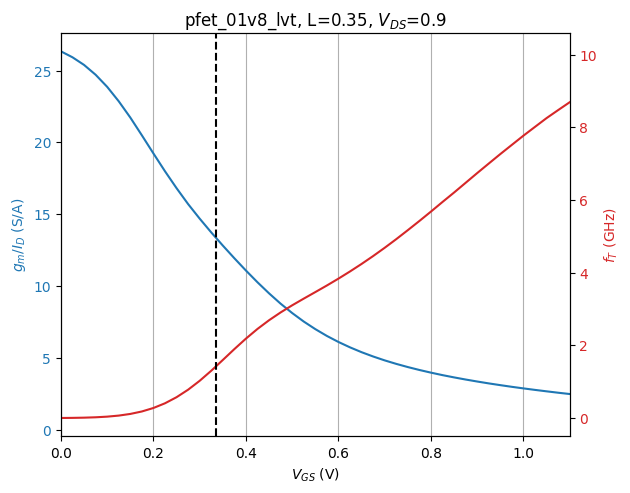

In [6]:
L1 = min(l); VDS1=0.9; VSB1=0
df1 = df.loc[(df['l'] == L1) & (df['d'] == VDS1) & (df['b'] == VSB1)]
vgs1 = df1['g'].values
gm_id1 = df1['gm'].values/df1['id'].values
ft1 = df1['gm'].values/(df1['cgg'].values+2*cfringe)/2/np.pi

fig, ax1 = plt.subplots()
ax1.grid(axis='x')
ax1.set_xlabel('$V_{GS}$ (V)')
color = 'tab:blue'
ax1.set_ylabel('$g_m/I_D$ (S/A)', color=color)
ax1.plot(vgs1, gm_id1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('$f_T$ (GHz)', color=color)
ax2.plot(vgs1, ft1/1e9, color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()
plt.title(devices[choice]+', L='+str(L1/1e-6)+', $V_{DS}$='+str(VDS1))
plt.xlim(0, 1.1)
plt.axvline(x = df1['vth'].values[0], color='k', linestyle='--')
plt.show()

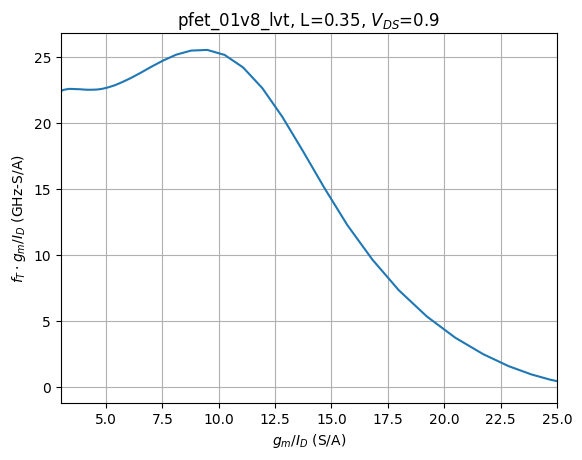

In [7]:
plt.plot(gm_id1, gm_id1*ft1/1e9)
plt.xlim(3, 25)
plt.xlabel('$g_m/I_D$ (S/A)')
plt.ylabel('$f_T\cdot g_m/I_D$ (GHz-S/A)')
plt.title(devices[choice]+', L='+str(L1/1e-6)+', $V_{DS}$='+str(VDS1))
plt.grid()
plt.show()

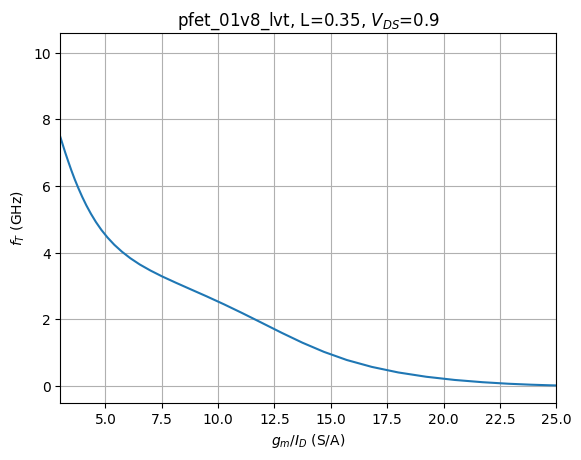

In [8]:
plt.plot(gm_id1, ft1/1e9)
plt.xlim(3, 25)
plt.xlabel('$g_m/I_D$ (S/A)')
plt.ylabel('$f_T$ (GHz)')
plt.title(devices[choice]+', L='+str(L1/1e-6)+', $V_{DS}$='+str(VDS1))
plt.grid()
plt.show()

In [9]:
VDS2=0.9; VSB2=0
df2 = df.loc[(df['d'] == VDS2) & (df['b'] == VSB2)]

gm_id2 = df2['gm'].values/df2['id'].values
gm_id2 = np.reshape(gm_id2, (len(vgs), -1), order='F')
gm_gds2 = df2['gm'].values/df2['gds'].values
gm_gds2 = np.reshape(gm_gds2, (len(vgs), -1), order='F')
ft2 = df2['gm'].values/(df2['cgg'].values+2*cfringe)/2/np.pi
ft2 = np.reshape(ft2, (len(vgs), -1), order='F')
jd2 = df2['id'].values/w[choice]
jd2 = np.reshape(jd2, (len(vgs), -1), order='F')

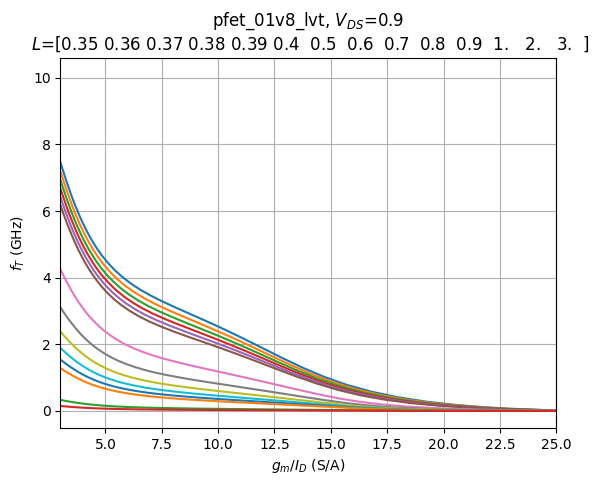

In [10]:
plt.plot(gm_id2, ft2/1e9)
plt.xlim(3, 25)
plt.xlabel('$g_m/I_D$ (S/A)')
plt.ylabel('$f_T$ (GHz)')
plt.title(devices[choice]+', $V_{DS}$='+str(VDS1)+'\n $L$='+np.array2string(l/1e-6, max_line_width=200))
plt.grid()
plt.show()

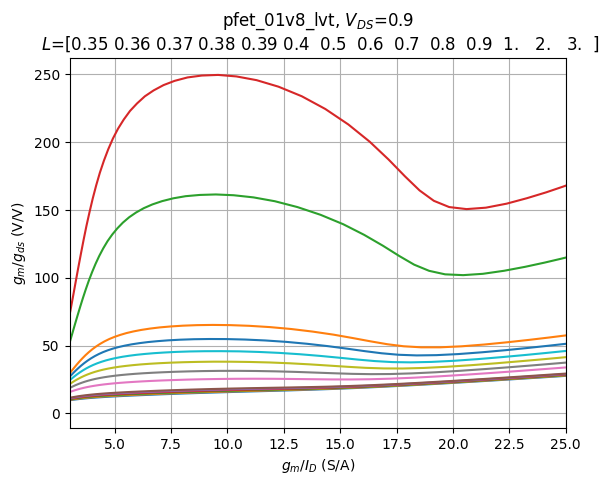

In [11]:
plt.plot(gm_id2, gm_gds2)
plt.xlim(3, 25)
plt.xlabel('$g_m/I_D$ (S/A)')
plt.ylabel('$g_m/g_{ds}$ (V/V)')
plt.title(devices[choice]+', $V_{DS}$='+str(VDS1)+'\n $L$='+np.array2string(l/1e-6, max_line_width=200))
plt.grid()
plt.show()

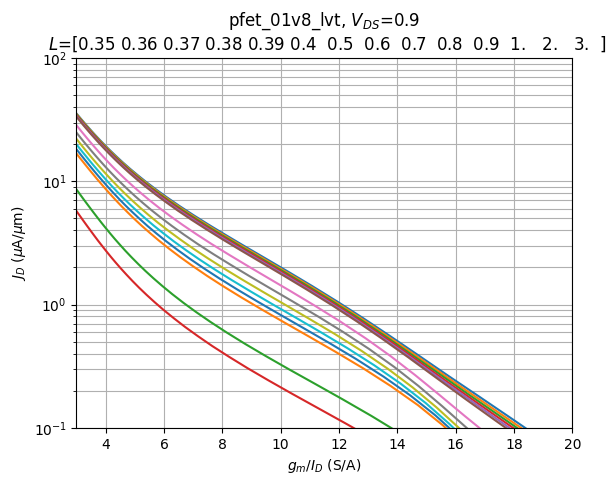

In [12]:
plt.semilogy(gm_id2, jd2)
plt.xlim(3, 20)
plt.ylim(1e-1, 1e2)
plt.xlabel('$g_m/I_D$ (S/A)')
plt.ylabel('$J_D$ ($\mu$A/$\mu$m)')
plt.grid(which='minor')
plt.grid(which='major')
plt.title(devices[choice]+', $V_{DS}$='+str(VDS1)+'\n $L$='+np.array2string(l/1e-6, max_line_width=200))
plt.show()

In [13]:
# Find values at some gm/ID
L = min(l); VDS=0.9; VSB=0; GM_ID=12
df3 = df.loc[(df['l'] == L) & (df['d'] == VDS) & (df['b'] == VSB)]
gm_id = df3['gm'].values/df3['id'].values
cgg = df3['cgg'].values
ft = df3['gm'].values/(cgg+2*cfringe)/2/np.pi
jd = df3['id'].values/w[choice]

JD = np.interp(GM_ID, gm_id[::-1], jd[::-1])
CGG = np.interp(GM_ID, gm_id[::-1], cgg[::-1])
CGGTOT = CGG+2*cfringe
FT = np.interp(GM_ID, gm_id[::-1], ft[::-1])
print('Given L: %.2e, VDS: %.2f, VSB: %.2f, GM_ID: %.2f'%(L, VDS, VSB, GM_ID))
print('JD: %.2f, CGG: %.2e, CGGTOT: %.2e, FT: %.2e'%(JD, CGG, CGGTOT, FT))

Given L: 3.50e-07, VDS: 0.90, VSB: 0.00, GM_ID: 12.00
JD: 1.04, CGG: 5.07e-15, CGGTOT: 5.27e-15, FT: 1.88e+09
